In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
import seaborn as sns; sns.set(style="white", color_codes=True)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from fpm_analysis.simulate_phase import SimulatedPhaseResult, glass_BK7, glass_SF10, COLORS

simulated_result = SimulatedPhaseResult(shape=(128, 128))

interactive(children=(Checkbox(value=True, description='same_material'), IntSlider(value=4, description='n_ste…

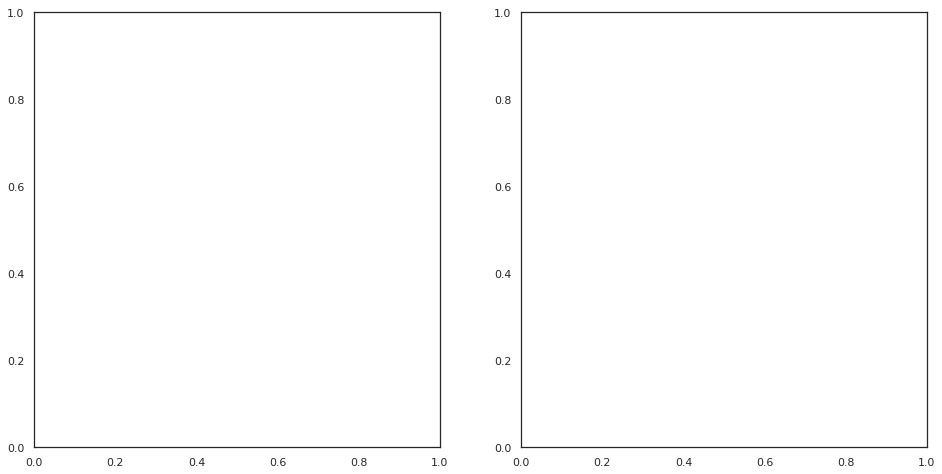

In [5]:
colors = sorted(COLORS.keys())
@interact(same_material=True, 
          n_steps=(2,8,2), 
          dh=(0.0, 10.0, 1.0), 
          offset=(-1.0, 1.0, 1.0), 
          noise=(0.0, 1.0, 0.1))
def make_ladder(same_material=True, n_steps=4, dh=10.0, offset=0.0, noise=1.0):
    simulated_result.reset_sim()
    simulated_result.make_ladder(same_material, n_steps, dh, offset)
    simulated_result.add_random_normal_noise(noise)
    fig, ax = plt.subplots(1, 2)
    simulated_result.plot_phase(ax=ax[0], color='r')
    r = simulated_result.plot_quotient('r/g', ax=ax[1])
    # fig.colorbar(r)
    plt.show()
    text = (f'Steps: {n_steps}\n'
            f'Height: {dh}\n'
            f'Offset: {offset}\n'
            f'Noise: {noise}')
    

In [12]:
@interact(x=['r/g', 'r/b', 'g/r', 'g/b', 'b/r', 'b/g'],
          y=['r/g', 'r/b', 'g/r', 'g/b', 'b/r', 'b/g'],
          r_shift=(0, 10.0, 1),
          g_shift=(0, 10.0, 1),
          b_shift=(0, 10.0, 1))
def plot_quotients_2d(x='r/g', y='b/g', r_shift=0.0, g_shift=0.0, b_shift=0.0):
    simulated_result.set_phase_shift(r=r_shift, g=g_shift, b=b_shift)
    g = sns.jointplot(x=simulated_result.get_quotient(x), y=simulated_result.get_quotient(y))

interactive(children=(Dropdown(description='x', options=('r/g', 'r/b', 'g/r', 'g/b', 'b/r', 'b/g'), value='r/g…